In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import sqlalchemy as db


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent[0])

2017-08-23


In [10]:
# Create value for recent date
recent_date = most_recent[0]
recent_date

'2017-08-23'

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
year_date



datetime.date(2016, 8, 23)

<function matplotlib.pyplot.show(close=None, block=None)>

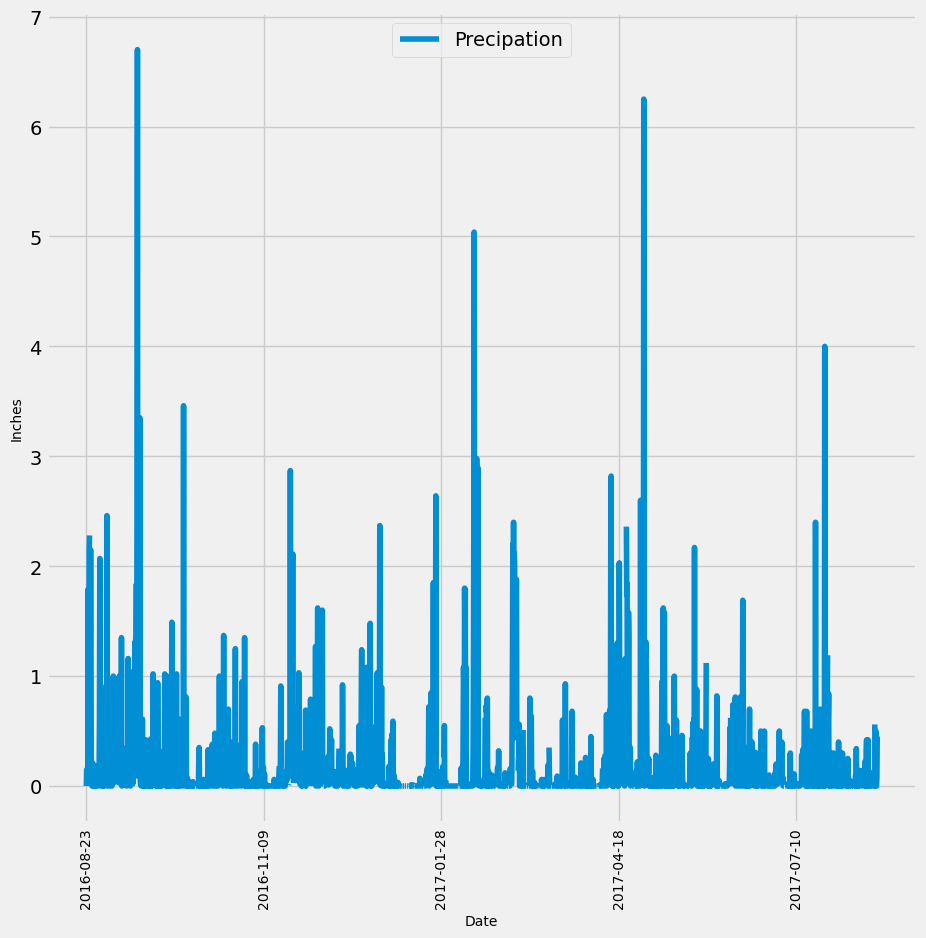

In [12]:
# Calculate the date one year from the last date in data set.

precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_date).\
    order_by(Measurement.date).all()


# Perform a query to retrieve the data and precipitation scores

scores = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precip_df = pd.DataFrame(precip, columns=["Date", "Precipation"])

# Sort the dataframe by date
precip_df.set_index("Date", inplace = True,)
precip_df.head()


# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize = (10,10))
plt.legend(loc='upper center')
plt.xticks(rotation='vertical',fontsize=10)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Inches", fontsize=10)
plt.show



In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

active_station_temps = session.query(*temps).\
    filter(Measurement.station == "USC00519281").all()
active_station_temps

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

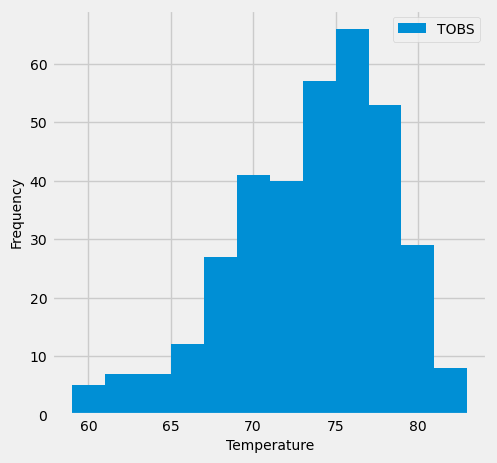

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_obs = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
    
active_station_obs_df = pd.DataFrame(active_station_obs, columns=["TOBS"])  


active_station_obs_df.plot.hist(bins = 12, figsize = (5,5))
plt.legend(loc='upper right', fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize = 10)
plt.xlabel("Temperature", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show

# Close Session

In [18]:
# Close Session
session.close()